In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [3]:
cars = pd.read_csv('C:\\Users\\Adkeme\\Downloads\\Car Price Model\\car_price_prediction.csv')
cars

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
cars.shape

(19237, 18)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
cars.rename(columns = {'Prod. year':'ProdYear', 'Leather interior':'LeatherInterior',
                              'Fuel type':'FuelType','Engine volume':'EngineVolume','Gear box type':'GearBoxType','Drive wheels':'DriveWheels'}, inplace = True)

In [7]:
cars.describe()

,ID,Price,ProdYear,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
cars.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [9]:
#Checking for Null Values
cars.isnull().sum().sum()

0

In [10]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [11]:
cars.duplicated().sum()

313

In [12]:
(~cars.duplicated()).sum()

18924

In [13]:
dup = cars.drop_duplicates()
dup

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [14]:
cars_updated = dup.copy()
updated1 = cars_updated['Price'] < 10000
updated1.head()
updated2 = cars_updated['Price'] > 100000
updated2.head()
cars_updated.loc[updated1, 'Price'] = np.nan
cars_updated.loc[updated2, 'Price'] = np.nan
cars_updated

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,NaN,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,NaN,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,NaN,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681.0,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108.0,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,NaN,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [15]:
cars_updated.isna().sum().sum()

7546

In [16]:
cars_updated.dropna(inplace=True)
cars_updated

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493.0,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
9,45756839,26657.0,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19222,45732720,10036.0,639,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2,735970 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
19224,45768089,19130.0,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19227,45769427,29793.0,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19233,45778856,15681.0,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8


In [17]:
# To remove the "km" in the Mileage
cars_updated['Mileage'] = cars_updated['Mileage'].str.replace("km",'', regex=True)
cars_updated['Mileage'] = pd.to_numeric(cars_updated['Mileage'], errors='coerce')
cars_updated

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493.0,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4
9,45756839,26657.0,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19222,45732720,10036.0,639,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2,735970,4.0,Automatic,Front,04-May,Left wheel,Silver,4
19224,45768089,19130.0,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,04-May,Left wheel,Black,12
19227,45769427,29793.0,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19233,45778856,15681.0,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8


In [18]:
cars_updated['Levy']= pd.to_numeric(cars_updated['Levy'], errors='coerce')

In [19]:
cars_updated

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4
9,45756839,26657.0,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19222,45732720,10036.0,639.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2,735970,4.0,Automatic,Front,04-May,Left wheel,Silver,4
19224,45768089,19130.0,NaN,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,04-May,Left wheel,Black,12
19227,45769427,29793.0,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19233,45778856,15681.0,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8


In [20]:
cars_updated.dropna(inplace=True)
cars_updated

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4
14,45732604,59464.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,76000,4.0,Automatic,Front,04-May,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,45804344,26017.0,1624.0,LEXUS,ES 300,2009,Sedan,Yes,Petrol,3.5,132700,4.0,Automatic,Front,04-May,Left wheel,White,4
19222,45732720,10036.0,639.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2,735970,4.0,Automatic,Front,04-May,Left wheel,Silver,4
19227,45769427,29793.0,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19233,45778856,15681.0,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8


In [21]:
cars_updated['EngineVolume'] = [float(value.split(' ')[0]) for value in cars_updated['EngineVolume']]

In [22]:
cars_updated

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,04-May,Left wheel,White,4
14,45732604,59464.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,76000,4.0,Automatic,Front,04-May,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,45804344,26017.0,1624.0,LEXUS,ES 300,2009,Sedan,Yes,Petrol,3.5,132700,4.0,Automatic,Front,04-May,Left wheel,White,4
19222,45732720,10036.0,639.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2.0,735970,4.0,Automatic,Front,04-May,Left wheel,Silver,4
19227,45769427,29793.0,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19233,45778856,15681.0,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8


In [23]:
cars_updated['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

In [24]:
cars_updated

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
5,45802912,39493.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,4-5,Left wheel,White,4
14,45732604,59464.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,76000,4.0,Automatic,Front,4-5,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,45804344,26017.0,1624.0,LEXUS,ES 300,2009,Sedan,Yes,Petrol,3.5,132700,4.0,Automatic,Front,4-5,Left wheel,White,4
19222,45732720,10036.0,639.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2.0,735970,4.0,Automatic,Front,4-5,Left wheel,Silver,4
19227,45769427,29793.0,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,4-5,Left wheel,Black,12
19233,45778856,15681.0,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8


In [25]:
cars_updated.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'ProdYear', 'Category',
       'LeatherInterior', 'FuelType', 'EngineVolume', 'Mileage', 'Cylinders',
       'GearBoxType', 'DriveWheels', 'Doors', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

In [26]:
print(cars_updated.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count     8027.000000
mean     25503.846393
std      14853.067404
min      10000.000000
25%      15053.000000
50%      20266.000000
75%      31988.000000
85%      40926.000000
90%      46414.000000
100%     99440.000000
max      99440.000000
Name: Price, dtype: float64


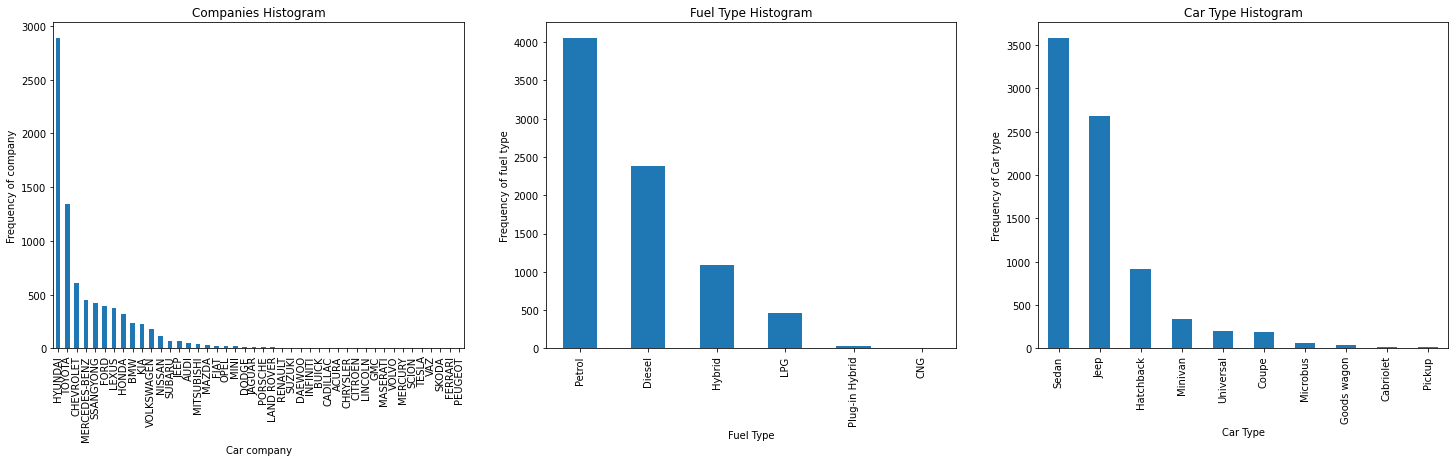

In [27]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars_updated.Manufacturer.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars_updated.FuelType.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars_updated.Category.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

[Text(0.5, 0, 'Car Price'), Text(0, 0.5, 'Frequency of price')]

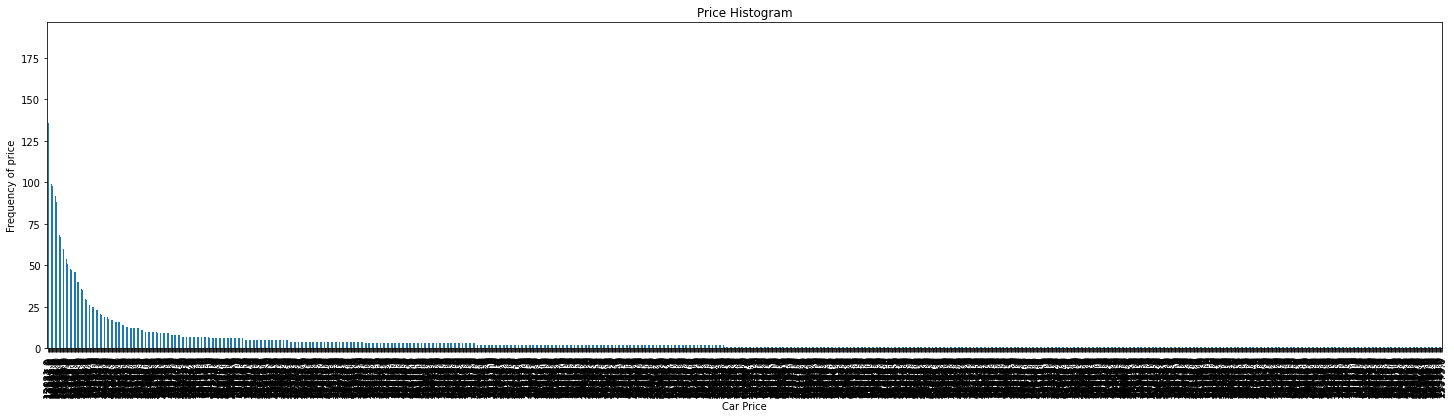

In [28]:
plt.figure(figsize=(25, 6))

plt.subplot(1,1,1)
plt1 = cars_updated.Price.value_counts().plot(kind = 'bar')
plt.title('Price Histogram')
plt1.set(xlabel = 'Car Price', ylabel='Frequency of price')

In [29]:
cars_updated['Price'].max()

99440.0

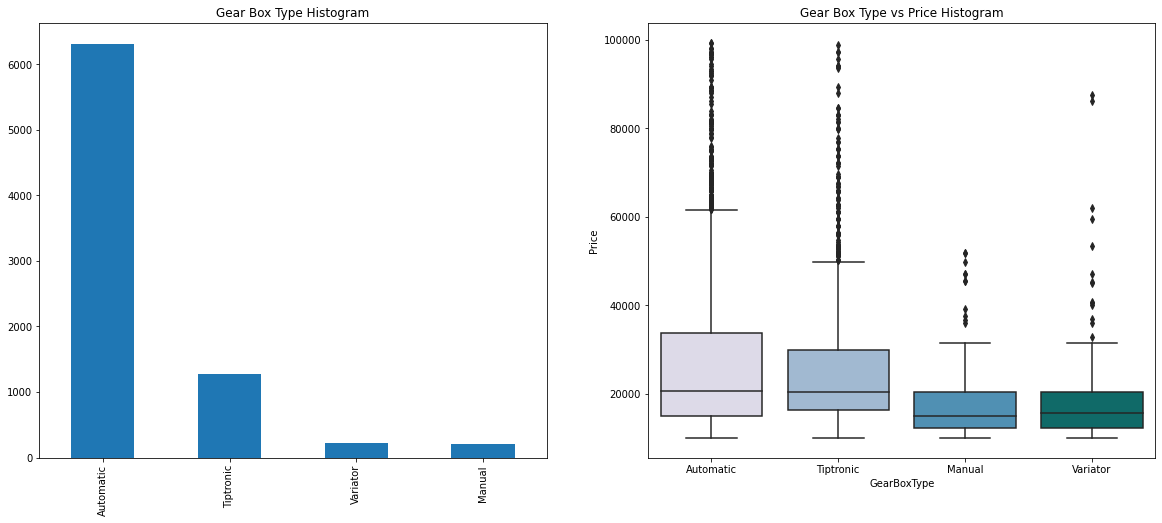

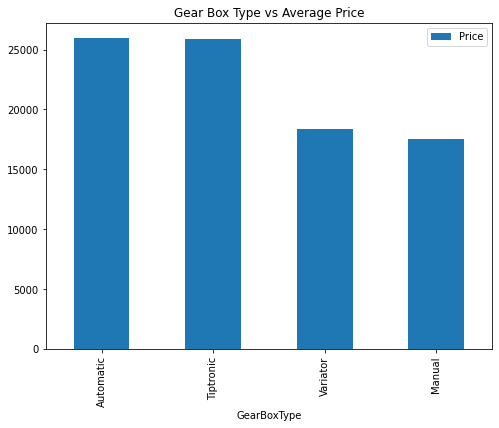

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Gear Box Type Histogram')
plt1 = cars_updated.GearBoxType.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
plt.title('Gear Box Type vs Price Histogram')
sns.boxplot(x=cars_updated.GearBoxType, y=cars_updated.Price, palette=("PuBuGn"))
df = pd.DataFrame(cars_updated.groupby(['GearBoxType'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Gear Box Type vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

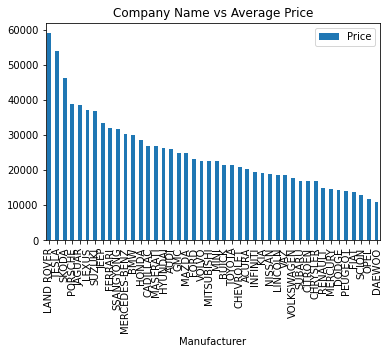

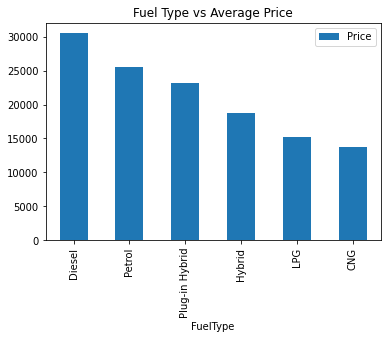

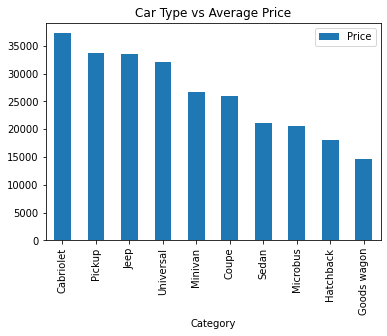

In [31]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars_updated.groupby(['Manufacturer'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars_updated.groupby(['FuelType'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars_updated.groupby(['Category'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

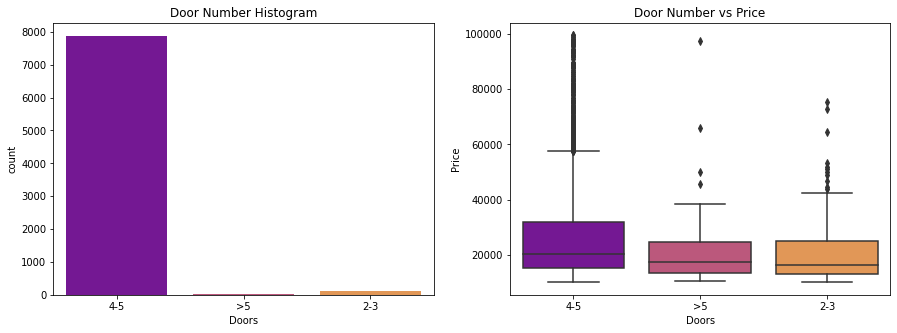

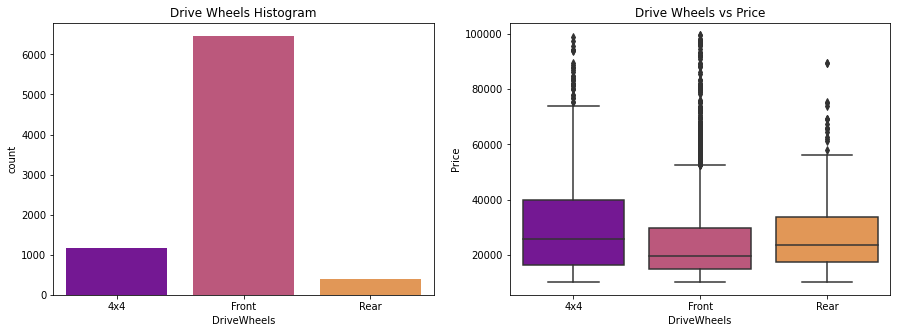

In [32]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars_updated.Doors, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars_updated.Doors, y=cars_updated.Price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Drive Wheels Histogram')
sns.countplot(cars_updated.DriveWheels, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Drive Wheels vs Price')
sns.boxplot(x=cars_updated.DriveWheels, y=cars_updated.Price, palette=("plasma"))

plt.show()

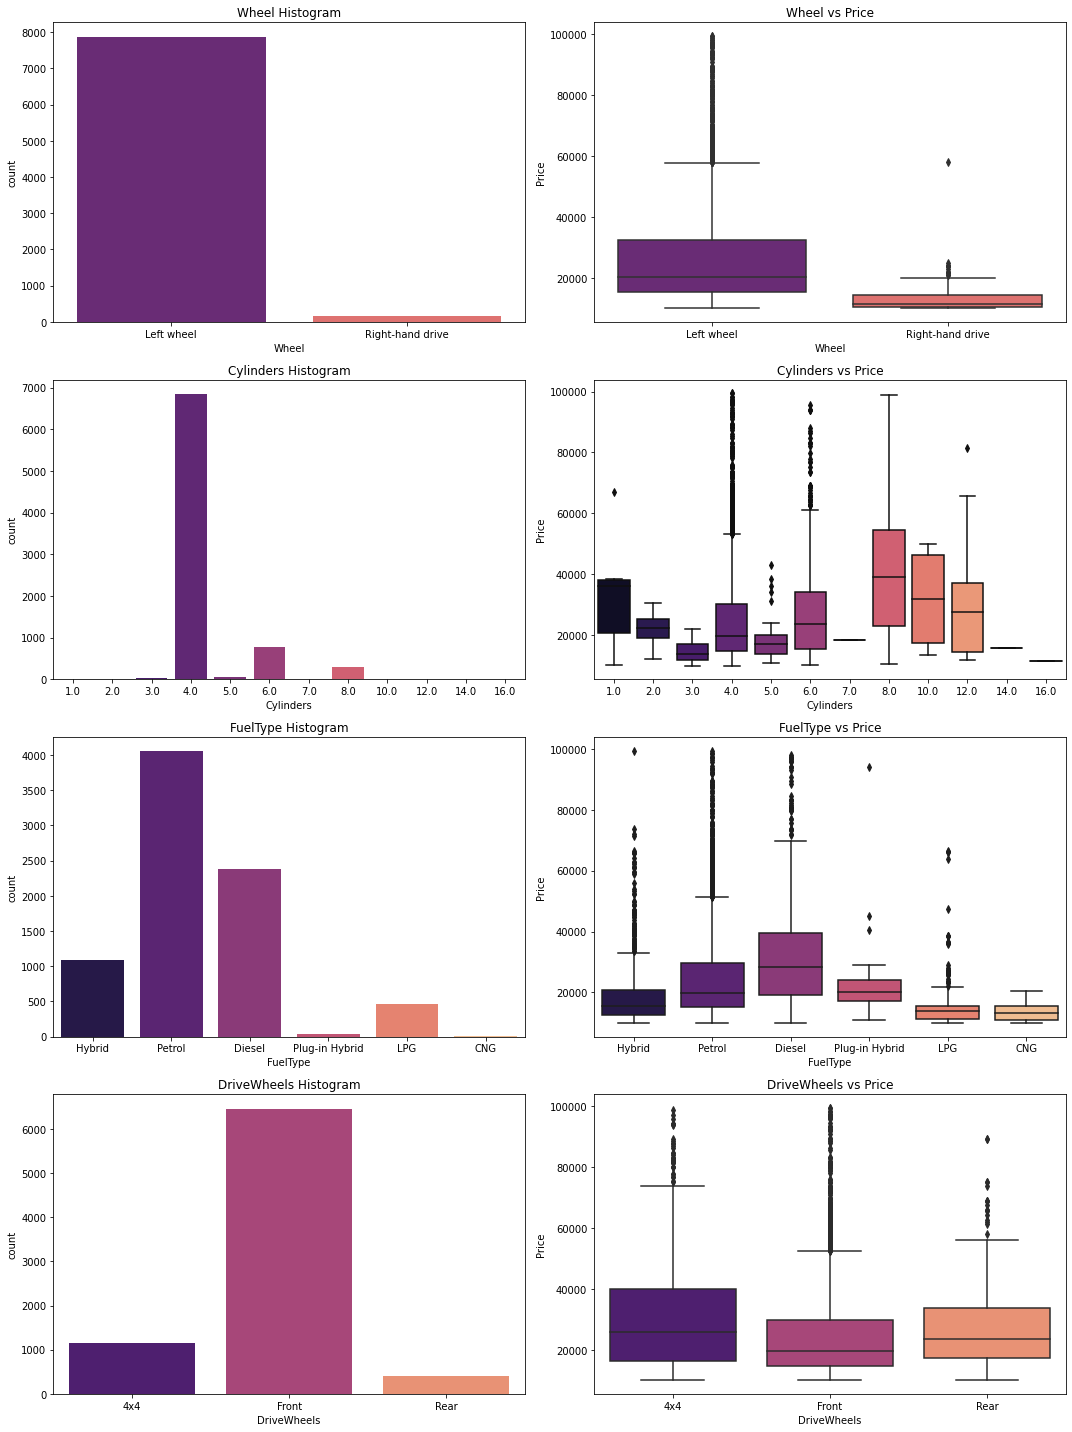

In [33]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars_updated[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars_updated[x], y=cars_updated.Price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('Wheel', 1)
plot_count('Cylinders', 3)
plot_count('FuelType', 5)
plot_count('DriveWheels', 7)

plt.tight_layout()

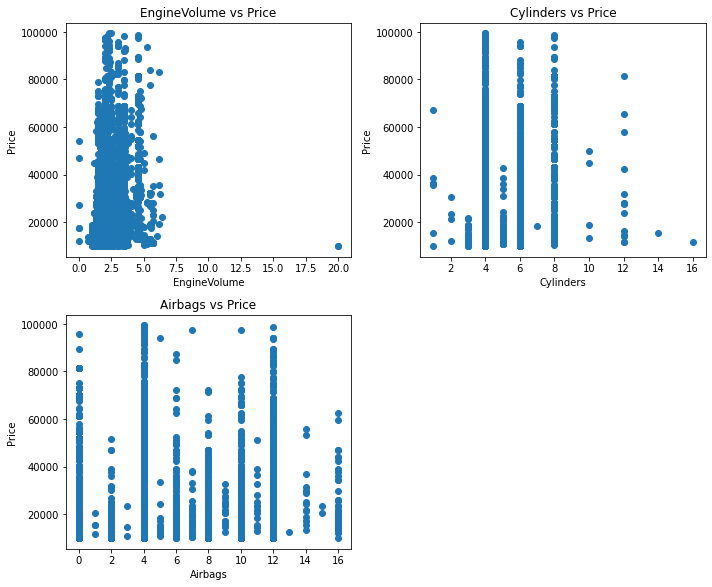

In [34]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars_updated[x],cars_updated['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('EngineVolume', 1)
scatter('Cylinders', 2)
scatter('Airbags', 3)

plt.tight_layout()

<AxesSubplot:xlabel='Price', ylabel='Levy'>

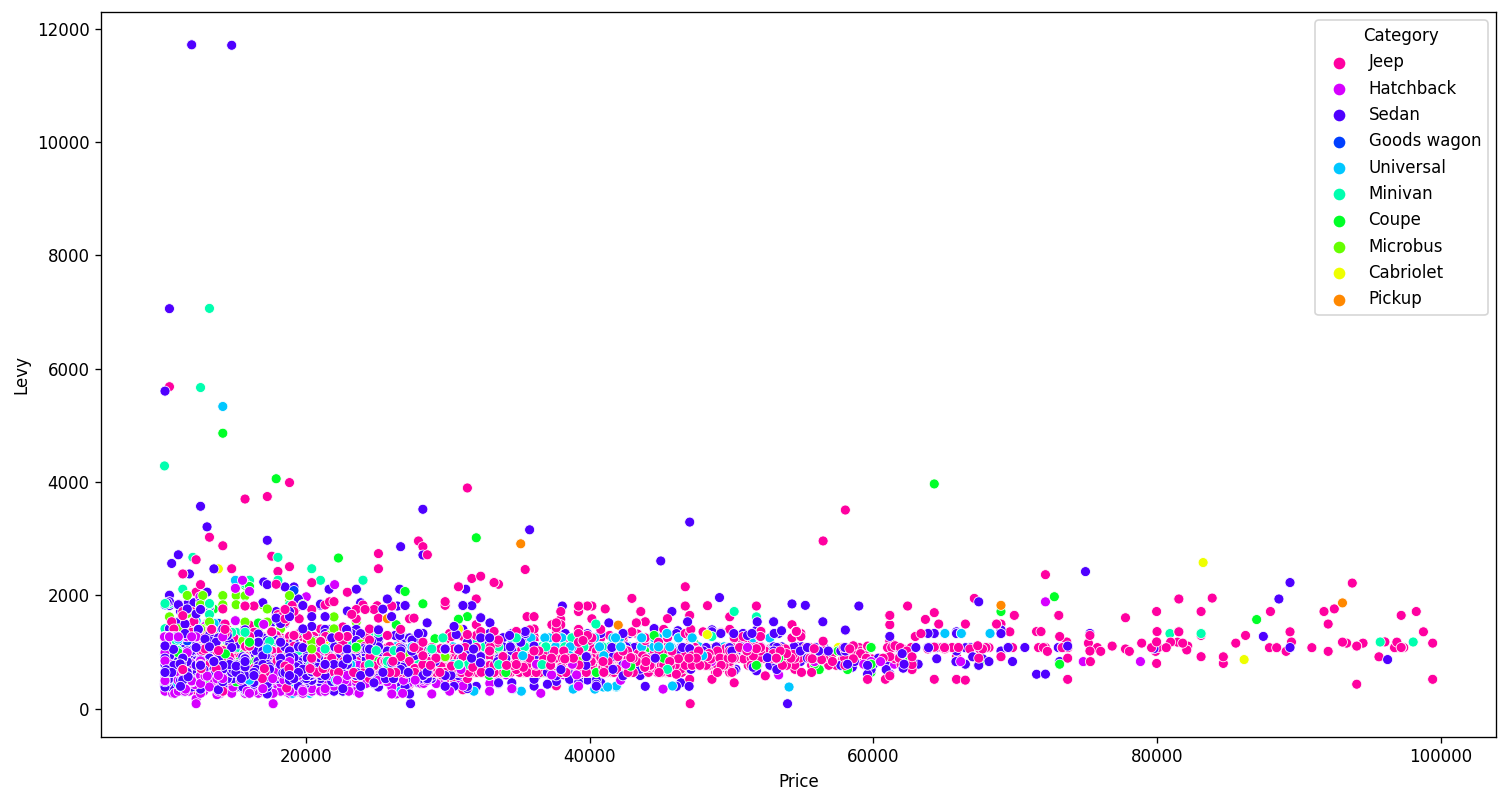

In [35]:
plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=cars_updated, x='Price', y='Levy', hue="Category", palette="hsv_r")

<AxesSubplot:>

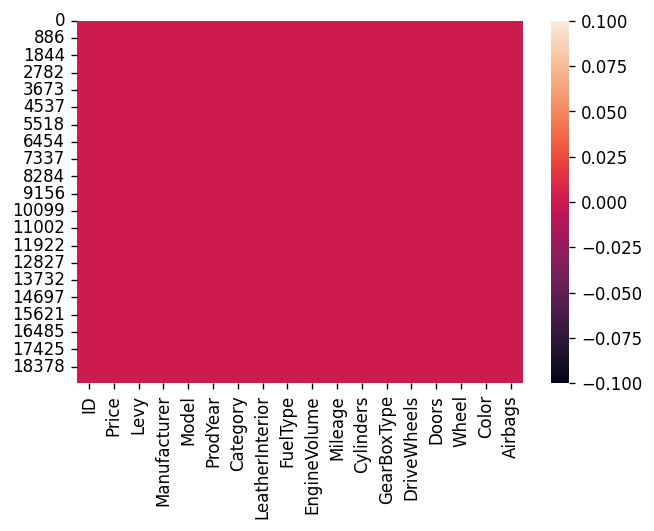

In [36]:
plt.figure(dpi=120)
sns.heatmap(cars_updated.isna())

In [37]:
cars_updated['Levy'].fillna(cars_updated['Levy'].median(), inplace=True)

In [38]:
cars_updated

,ID,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
5,45802912,39493.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,4-5,Left wheel,White,4
14,45732604,59464.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,76000,4.0,Automatic,Front,4-5,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,45804344,26017.0,1624.0,LEXUS,ES 300,2009,Sedan,Yes,Petrol,3.5,132700,4.0,Automatic,Front,4-5,Left wheel,White,4
19222,45732720,10036.0,639.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2.0,735970,4.0,Automatic,Front,4-5,Left wheel,Silver,4
19227,45769427,29793.0,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,4-5,Left wheel,Black,12
19233,45778856,15681.0,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8


<AxesSubplot:xlabel='Levy', ylabel='Density'>

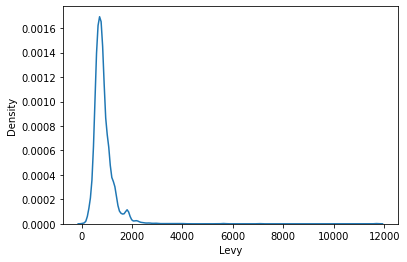

In [39]:
sns.kdeplot(cars_updated['Levy'])

In [40]:
cars_f = cars_updated.drop(['ID'], axis=1)
cars_f

,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
4,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
5,39493.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,4-5,Left wheel,White,4
14,59464.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,76000,4.0,Automatic,Front,4-5,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,26017.0,1624.0,LEXUS,ES 300,2009,Sedan,Yes,Petrol,3.5,132700,4.0,Automatic,Front,4-5,Left wheel,White,4
19222,10036.0,639.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2.0,735970,4.0,Automatic,Front,4-5,Left wheel,Silver,4
19227,29793.0,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,4-5,Left wheel,Black,12
19233,15681.0,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8


In [41]:
for col in cars_f.select_dtypes('object').columns:
    le = LabelEncoder()
    cars_f[col] = le.fit_transform(cars_f[col])

In [42]:
cars_f

,Price,Levy,Manufacturer,Model,ProdYear,Category,LeatherInterior,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
0,13328.0,1399.0,21,508,2010,4,1,2,3.5,186005,6.0,0,0,1,0,12,12
1,16621.0,1018.0,5,256,2011,4,0,4,3.0,192000,6.0,2,0,1,0,1,8
4,11726.0,446.0,14,271,2014,3,1,4,1.3,91901,4.0,0,1,1,0,12,4
5,39493.0,891.0,15,524,2016,4,1,1,2.0,160931,4.0,0,1,1,0,14,4
14,59464.0,891.0,15,524,2016,4,1,1,2.0,76000,4.0,0,1,1,0,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,26017.0,1624.0,21,231,2009,8,1,4,3.5,132700,4.0,0,1,1,0,14,4
19222,10036.0,639.0,15,537,2014,8,1,3,2.0,735970,4.0,0,1,1,0,12,4
19227,29793.0,1053.0,25,220,2014,8,1,1,3.5,219030,6.0,0,0,1,0,1,12
19233,15681.0,831.0,15,537,2011,8,1,4,2.4,161600,4.0,2,1,1,0,11,8


In [46]:
x = cars_f.drop(['Price', 'Color'], axis=1).values
y = cars_f['Price'].values
x = MinMaxScaler().fit_transform(x)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [53]:
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)

regressors = [ ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf)]

K Nearest Neighbours : 65 %
Decision Tree : 48 %
Random Forest : 77 %


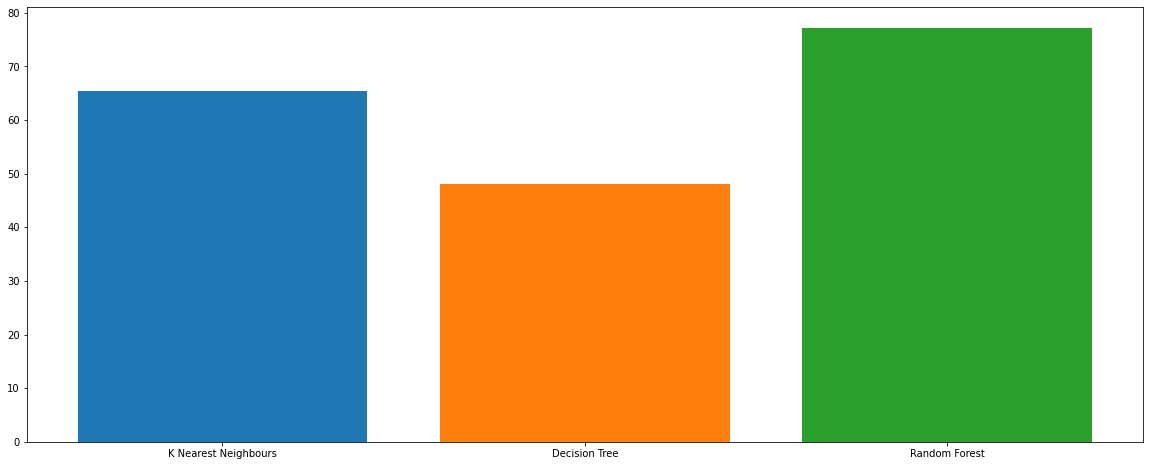

In [54]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train, y_train)    
  
    y_pred = regressor.predict(x_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [55]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

K Nearest Neighbours : 65 %
Decision Tree : 53 %
Random Forest : 77 %


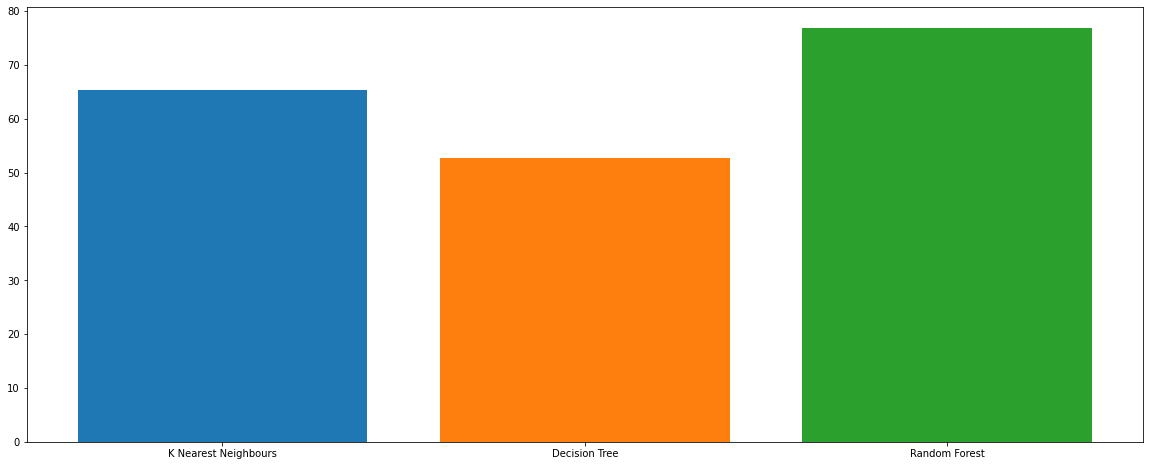

In [56]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train_trans, y_train)    
  
    y_pred = regressor.predict(x_test_trans)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)